Lineplots for traffic data: HColo EM LK

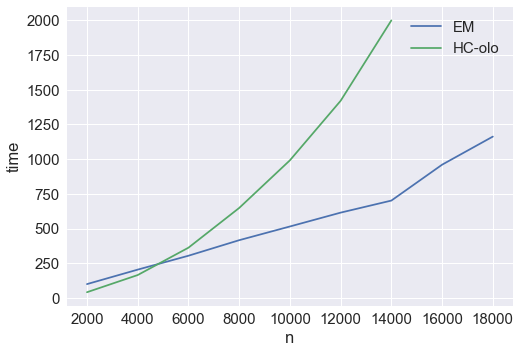

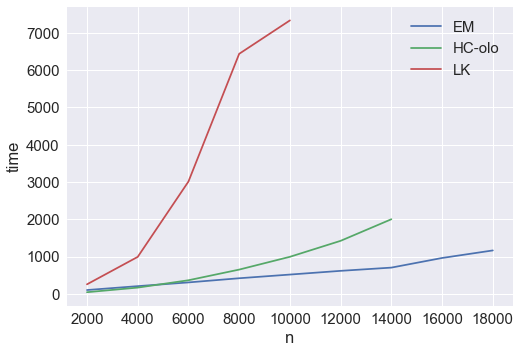

In [42]:
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

traffic_data=pd.read_csv('traffic.txt',delimiter=' ',header=0)
#print magic_data

n_list=traffic_data.n.unique()
print n_list

for n in n_list:
    #if n<500:
    #    continue
    traffic_n=traffic_data.loc[(traffic_data.n==n)]
    
    traffic_em=traffic_n.loc[traffic_n.ordering=='EM']
    traffic_hc=traffic_n.loc[traffic_n.ordering=='HColo']
    traffic_lk=traffic_n.loc[traffic_n.ordering=='LK']
    #print traffic_lk
    
    sns.plt.clf()
    sns.plt.plot(traffic_em['m'].tolist(), traffic_em['time'].tolist(), '-', label='EM')
    sns.plt.plot(traffic_hc['m'].tolist(), traffic_hc['time'].tolist(), '-', label='HC-olo')
    #if not traffic_lk.empty:
    #    sns.plt.plot(traffic_lk['m'].tolist(), traffic_lk['time'].tolist(), '-', label='LK')
    ax = sns.plt.gca()
    ax.set(xlabel='m', ylabel='time')
    sns.plt.legend(loc='best')
    sns.plt.savefig('emhc-'+str(n)+'.png')
    sns.plt.show()
    
"""
traffic_data=pd.read_excel('magic.xlsx',header=0)
magic_em=magic_data.loc[magic_data.ordering=='EM']
magic_hc=magic_data.loc[magic_data.ordering=='HC-olo']
magic_lk=magic_data.loc[magic_data.ordering=='LK']

sns.plt.clf()
sns.plt.plot(magic_em['n'].tolist(), magic_em['time'].tolist(), '-', label='EM')
sns.plt.plot(magic_hc['n'].tolist(), magic_hc['time'].tolist(), '-', label='HC-olo')
#sns.plt.plot(magic_lk['n'].tolist(), magic_lk['time'].tolist(), '-', label='LK')
ax = sns.plt.gca()
ax.set(xlabel='n', ylabel='time')
sns.plt.legend(loc='best')
sns.plt.savefig('emhc.png')
sns.plt.show()


sns.plt.plot(magic_em['n'].tolist(), magic_em['time'].tolist(), '-', label='EM')
sns.plt.plot(magic_hc['n'].tolist(), magic_hc['time'].tolist(), '-', label='HC-olo')
sns.plt.plot(magic_lk['n'].tolist(), magic_lk['time'].tolist(), '-', label='LK')
ax = sns.plt.gca()
ax.set(xlabel='n', ylabel='time')
sns.plt.legend(loc='best')
sns.plt.savefig('emhclk.png')
sns.plt.show()
"""


Lineplots for magic data: HColo Em Lk

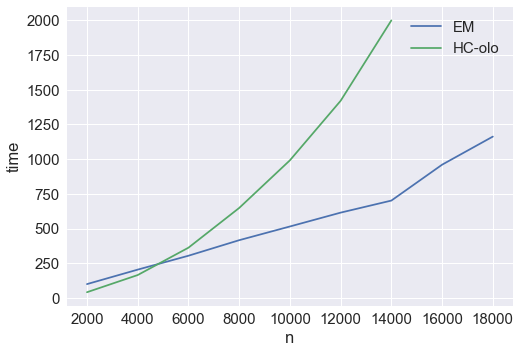

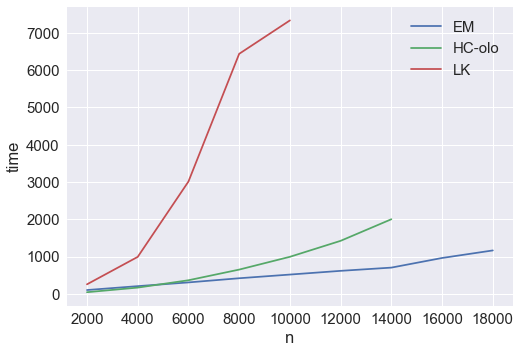

In [41]:
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

magic_data=pd.read_excel('magic.xlsx',header=0)
#print magic_data

magic_em=magic_data.loc[magic_data.ordering=='EM']
magic_hc=magic_data.loc[magic_data.ordering=='HC-olo']
magic_lk=magic_data.loc[magic_data.ordering=='LK']

sns.plt.clf()
sns.plt.plot(magic_em['n'].tolist(), magic_em['time'].tolist(), '-', label='EM')
sns.plt.plot(magic_hc['n'].tolist(), magic_hc['time'].tolist(), '-', label='HC-olo')
#sns.plt.plot(magic_lk['n'].tolist(), magic_lk['time'].tolist(), '-', label='LK')
ax = sns.plt.gca()
ax.set(xlabel='n', ylabel='time')
sns.plt.legend(loc='best')
sns.plt.savefig('em-hc.png')
sns.plt.show()


sns.plt.plot(magic_em['n'].tolist(), magic_em['time'].tolist(), '-', label='EM')
sns.plt.plot(magic_hc['n'].tolist(), magic_hc['time'].tolist(), '-', label='HC-olo')
sns.plt.plot(magic_lk['n'].tolist(), magic_lk['time'].tolist(), '-', label='LK')
ax = sns.plt.gca()
ax.set(xlabel='n', ylabel='time')
sns.plt.legend(loc='best')
sns.plt.savefig('em-hc-lk.png')
sns.plt.show()

In [41]:
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

#import os
#os.chdir('E:/Master-thesis/7. source code/LiClipse/tspmean/src')
#import viz

metrics_dir='E:/Master-thesis/output/evaluation/metrics/data/'
metrics_file='metrics_data.csv'

#all files in the dir
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(metrics_dir) if isfile(join(metrics_dir, f))]

print onlyfiles

if metrics_file in onlyfiles:
    onlyfiles.remove(metrics_file)
      
df_list=[]
    
for filename in onlyfiles:

    df=pd.read_csv(metrics_dir+filename,delimiter=',',header=0)
    df_list.append(df)

df_full=pd.concat(df_list,axis=0)

#print df_full
df_full.drop('parameter',axis=1,inplace=True)
df_full.reset_index(inplace=True)
df_full.drop('index',axis=1,inplace=True)
#print df_full
#df_em=df_full.loc[(df_full.ordering=='EM') | (df_full.ordering=='EMmanhattan')]
#df = df.drop(df[<some boolean condition>].index)
df_full.drop(df_full[df_full.ordering=='original'].index,inplace=True)
df_full['ratio']=0
df_full['place']=0
ordering_methods=df_full.ordering.unique()
datasets=df_full.dataset.unique()

for dataset in datasets:
    #loc metrics for this dataset
    df_dataset=df_full.loc[df_full.dataset==dataset]
    metrics=df_dataset.metric.unique()
    for metric in metrics:
        #find all rows
        data=df_dataset.loc[df_dataset.metric==metric]
        base=data.loc[data.ordering=='random','value'].values[0]
        data.sort_values(by='value',inplace=True)
        print data
        #print base
        place=1
        for index,row in data.iterrows():
            df_full.loc[index,'ratio']=df_full.loc[index,'value']/base
            df_full.loc[index,'place']=place
            place+=1
            
print df_full

['aaup_data.txt', 'abalone_data.txt', 'alon_data.txt', 'auto_data.txt', 'bike_data.txt', 'cars_data.txt', 'community_data.txt', 'golub_data.txt', 'income_data.txt', 'iris_data.txt', 'magic_data.txt', 'noisy_wave_data.txt', 'olive_data.txt', 'parkinson_data.txt', 'subway_data.txt', 'traffic_data.txt', 'waveform_data.txt', 'wdbc_data.txt', 'wine_data.txt', 'yeast_data.txt']
   dataset     ordering          metric         value  ratio  place
28    aaup           LK  neumann_stress  55545.611912      0      0
12    aaup     TSPmeans  neumann_stress  55921.220762      0      0
24    aaup        HColo  neumann_stress  56468.427496      0      0
20    aaup  EMmanhattan  neumann_stress  56648.166355      0      0
16    aaup           EM  neumann_stress  56938.481688      0      0
0     aaup         TSNE  neumann_stress  69401.353398      0      0
32    aaup          MDS  neumann_stress  78516.346722      0      0
4     aaup       random  neumann_stress  98923.285784      0      0
   dataset   

C:\Users\khamidova\Anaconda2\lib\site-packages\ipykernel\__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   dataset     ordering                 metric      value  ratio  place
30    aaup           LK  path_length_manhattan   238384.0      0      0
14    aaup     TSPmeans  path_length_manhattan   252522.0      0      0
22    aaup  EMmanhattan  path_length_manhattan   253876.0      0      0
26    aaup        HColo  path_length_manhattan   258588.0      0      0
18    aaup           EM  path_length_manhattan   265514.0      0      0
2     aaup         TSNE  path_length_manhattan   615014.0      0      0
34    aaup          MDS  path_length_manhattan   862586.0      0      0
6     aaup       random  path_length_manhattan  1846834.0      0      0
   dataset     ordering metric     value  ratio  place
27    aaup        HColo    fom  0.238793      0      0
31    aaup           LK    fom  0.239655      0      0
15    aaup     TSPmeans    fom  0.242241      0      0
19    aaup           EM    fom  0.253448      0      0
23    aaup  EMmanhattan    fom  0.254310      0      0
3     aaup         TSN

    dataset     ordering                 metric          value  ratio  place
172    cars           LK  path_length_euclidian   11474.588549    0.0      0
160    cars     TSPmeans  path_length_euclidian   13854.014160    0.0      0
169    cars        HColo  path_length_euclidian   14704.555305    0.0      0
175    cars          MDS  path_length_euclidian   21825.808741    0.0      0
151    cars         TSNE  path_length_euclidian   41509.706127    0.0      0
166    cars  EMmanhattan  path_length_euclidian   64814.322069    0.0      0
163    cars           EM  path_length_euclidian   72282.447817    0.0      0
154    cars       random  path_length_euclidian  374631.188028    0.0      0
    dataset     ordering                 metric     value  ratio  place
173    cars           LK  path_length_manhattan   16840.6    0.0      0
161    cars     TSPmeans  path_length_manhattan   19961.0    0.0      0
170    cars        HColo  path_length_manhattan   20736.6    0.0      0
176    cars        

    dataset     ordering          metric          value  ratio  place
303   magic     TSPmeans  neumann_stress   69673.569614    0.0      0
307   magic           EM  neumann_stress   75583.109273    0.0      0
311   magic  EMmanhattan  neumann_stress   76980.581587    0.0      0
291   magic         TSNE  neumann_stress  106535.491519    0.0      0
295   magic       random  neumann_stress  109760.315117    0.0      0
    dataset     ordering                 metric         value  ratio  place
304   magic     TSPmeans  path_length_euclidian  3.903727e+05    0.0      0
308   magic           EM  path_length_euclidian  7.501607e+05    0.0      0
312   magic  EMmanhattan  path_length_euclidian  8.047786e+05    0.0      0
292   magic         TSNE  path_length_euclidian  2.489783e+06    0.0      0
296   magic       random  path_length_euclidian  2.842910e+06    0.0      0
    dataset     ordering                 metric         value  ratio  place
305   magic     TSPmeans  path_length_manhattan 

       dataset     ordering metric     value  ratio  place
410  parkinson  EMmanhattan    fom  0.118557    0.0      0
406  parkinson           EM    fom  0.134021    0.0      0
414  parkinson        HColo    fom  0.164948    0.0      0
402  parkinson     TSPmeans    fom  0.180412    0.0      0
418  parkinson           LK    fom  0.185567    0.0      0
422  parkinson          MDS    fom  0.252577    0.0      0
390  parkinson         TSNE    fom  0.402062    0.0      0
394  parkinson       random    fom  0.412371    0.0      0
    dataset     ordering          metric         value  ratio  place
441  subway        HColo  neumann_stress  1.075055e+09    0.0      0
435  subway           EM  neumann_stress  1.131929e+09    0.0      0
438  subway  EMmanhattan  neumann_stress  1.290805e+09    0.0      0
447  subway          MDS  neumann_stress  1.465755e+09    0.0      0
432  subway     TSPmeans  neumann_stress  2.003533e+09    0.0      0
423  subway         TSNE  neumann_stress  2.280873e+09 

    dataset     ordering          metric         value  ratio  place
561    wine     TSPmeans  neumann_stress  23026.468995    0.0      0
569    wine  EMmanhattan  neumann_stress  26091.421380    0.0      0
565    wine           EM  neumann_stress  26594.118242    0.0      0
549    wine         TSNE  neumann_stress  33201.090224    0.0      0
553    wine       random  neumann_stress  33721.141301    0.0      0
    dataset     ordering                 metric         value  ratio  place
562    wine     TSPmeans  path_length_euclidian   4268.493263    0.0      0
570    wine  EMmanhattan  path_length_euclidian  21925.123055    0.0      0
566    wine           EM  path_length_euclidian  24634.597657    0.0      0
550    wine         TSNE  path_length_euclidian  60417.037543    0.0      0
554    wine       random  path_length_euclidian  64512.727741    0.0      0
    dataset     ordering                 metric         value  ratio  place
563    wine     TSPmeans  path_length_manhattan   6519

Comparison of EM and EM manhattan

['aaup_data.txt', 'abalone_data.txt', 'alon_data.txt', 'auto_data.txt', 'bike_data.txt', 'cars_data.txt', 'community_data.txt', 'golub_data.txt', 'income_data.txt', 'iris_data.txt', 'magic_data.txt', 'noisy_wave_data.txt', 'olive_data.txt', 'parkinson_data.txt', 'subway_data.txt', 'traffic_data.txt', 'waveform_data.txt', 'wdbc_data.txt', 'wine_data.txt', 'yeast_data.txt']
       dataset     value   distance
0         aaup  1.000000  Euclidean
1      abalone  1.000000  Euclidean
2         alon  1.000000  Euclidean
3         auto  1.000000  Euclidean
4         bike  1.000000  Euclidean
5         cars  1.000000  Euclidean
6    community  1.000000  Euclidean
7        golub  1.000000  Euclidean
8       income  1.000000  Euclidean
9         iris  1.000000  Euclidean
10       magic  1.000000  Euclidean
11  noisy_wave  1.000000  Euclidean
12       olive  1.000000  Euclidean
13   parkinson  1.000000  Euclidean
14      subway  1.000000  Euclidean
15     traffic  1.000000  Euclidean
16    wavefor

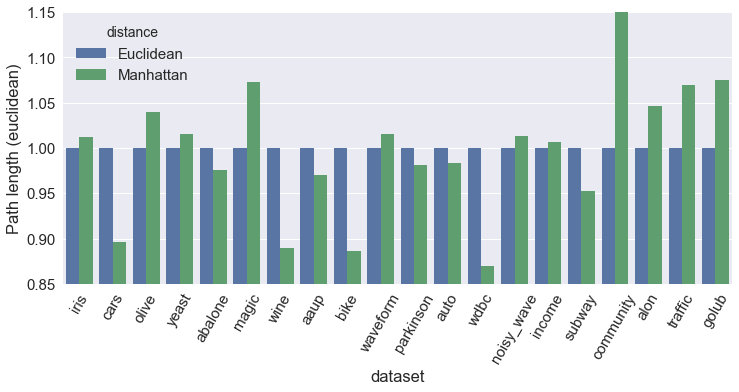

In [11]:
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

#import os
#os.chdir('E:/Master-thesis/7. source code/LiClipse/tspmean/src')
#import viz

metrics_dir='E:/Master-thesis/output/evaluation/metrics/data/'
metrics_file='metrics_data.csv'

#all files in the dir
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(metrics_dir) if isfile(join(metrics_dir, f))]

print onlyfiles

if metrics_file in onlyfiles:
    onlyfiles.remove(metrics_file)
      
df_list=[]
    
for filename in onlyfiles:

    df=pd.read_csv(metrics_dir+filename,delimiter=',',header=0)
    df_list.append(df)

df_full=pd.concat(df_list,axis=0)

#print df_full
df_full.drop('parameter',axis=1,inplace=True)
df_em=df_full.loc[(df_full.ordering=='EM') | (df_full.ordering=='EMmanhattan')]
"""
#FOM metric
df_fom=df_em.loc[(df_em.metric=='fom') & (df_em.dataset!='abalone')]
df_fom.loc[df_fom.ordering=='EM','ordering']='Euclidean'
df_fom.loc[df_fom.ordering=='EMmanhattan','ordering']='Manhattan'
df_fom.rename(columns={'ordering':'distance','value':'fom'}, inplace=True)

#df1=df_fom.loc[df_fom.dataset in ['aaup,golub']]
print df_fom
sns.set(font_scale=1.5)
fig=sns.plt.figure()
fig.set_size_inches(12, 5)
ax=sns.barplot(x="dataset", y="fom", hue="distance", data=df_fom,
            order=['iris','olive','yeast','magic','wine','aaup','waveform','parkinson','auto',\
            'wdbc','noisy_wave','alon','golub']);

ax.set(xlabel='dataset', ylabel='FOM')

sns.plt.xticks(rotation=45)
sns.plt.show()
#sns.plt.savefig('fom_plot.png') 



        

df_fom=df_em.loc[(df_em.metric=='path_length_manhattan')]
df_fom.loc[df_fom.ordering=='EM','ordering']='Euclidean'
df_fom.loc[df_fom.ordering=='EMmanhattan','ordering']='Manhattan'
df_fom.rename(columns={'ordering':'distance','value':'fom'}, inplace=True)
pivot=pd.pivot_table(df_fom,values='fom',columns=['distance'],index=['dataset'])
pivot.reset_index(inplace=True)                     
#df1=df_fom.loc[df_fom.dataset in ['aaup,golub']]
pivot['Manhattan']=pivot.apply(lambda row: row['Manhattan']/row['Euclidean'], axis=1)
pivot['Euclidean']=1
writer=pd.ExcelWriter('len_man.xls')
pivot.to_excel(writer)
writer.close()
#viz.scaledPC(pivot, 'stress_plot.png', 'distance')

#plt.show()
#sns.plt.savefig('stress_plot.png') 
"""

order2=['iris','cars','olive','yeast','abalone','magic','wine','aaup','bike','waveform',\
        'parkinson','auto','wdbc','noisy_wave', 'income','subway','community','alon','traffic','golub']

data=pd.read_excel('len_euc.xls',header=0)
print data

sns.set(font_scale=1.5)
fig=sns.plt.figure()
fig.set_size_inches(12, 5)
ax=sns.barplot(x="dataset", y="value", hue="distance", data=data,
            order=order2);

ax.set(xlabel='dataset', ylabel='Path length (euclidean)')

sns.plt.xticks(rotation=60)
sns.plt.ylim(0.85,1.15)
sns.plt.show()
#sns.plt.savefig('fom_plot.png') 

In [22]:
import numpy as np
from sklearn.metrics import pairwise_distances

arr=np.array([[1,2],[3,7],[2,4],[5,1]])

dist=pairwise_distances(arr)
print dist
dist*=1000
dist=dist.astype(np.int64)
print dist

dist=dist.astype(str)

n_cities=len(dist)

matrix_s=''
for j in range(0,n_cities):
    matrix_s += ' '.join([dist[i,j] for i in xrange(j)])
            #print 'i:',i,'j',j
    matrix_s +='\n'

print matrix_s


[[ 0.          5.38516481  2.23606798  4.12310563]
 [ 5.38516481  0.          3.16227766  6.32455532]
 [ 2.23606798  3.16227766  0.          4.24264069]
 [ 4.12310563  6.32455532  4.24264069  0.        ]]
[[   0 5385 2236 4123]
 [5385    0 3162 6324]
 [2236 3162    0 4242]
 [4123 6324 4242    0]]

5385
2236 3162
4123 6324 4242

